In [1]:
from operator import imod
import pandas as pd
import numpy as np
import scanpy as sc
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
import scalex
from scalex.metrics import batch_entropy_mixing_score
import sys
from metrics import *
plt.rc('font', family='Helvetica')
plt.rcParams['pdf.fonttype'] = 42

In [2]:
palette = { 'Raw': (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
            'bbknn': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
            'scanorama': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
            'scVI': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
            'Seurat_v3': (1.0, 0.4980392156862745, 0.054901960784313725),
            'harmony':  (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
            'combat':(0.8392156862745098, 0.5450980392156863, 0.4980392156862745),
            'FastMNN':(0.7372549019607844, 0.7411764705882353, 0.13333333333333333)
            }

In [35]:
datasets =['CE69','CO69','adipose']
methods = ['Raw','bbknn','scVI','scanorama','harmony','Seurat_v3','combat','FastMNN']

### Silhouette_score & batch_entropy_mixing_score

In [52]:
Silhouette_score = pd.DataFrame(index = datasets, columns = methods)

for dataset in datasets:
    for method in methods:
        print(dataset+method)
        adata = sc.read_h5ad(f'/disk212/yupf/database/scRNA-seq/benchmark/{dataset}/{method}/adata.h5ad')
        batch_id = adata.obs['batch'].values.astype('object')
        celltype = adata.obs['celltype'].values.astype('object').astype('str')
        sample_size = 5000 if adata.shape[0] > 5000 else adata.shape[0]
        if 'X_'+method in list(adata.obsm.keys()):
            feature = adata.obsm['X_'+method]
            feature[np.isnan(feature)] = 0
            Silhouette_score.loc[dataset, method] = (silhouette_score(feature, celltype, sample_size=sample_size,random_state=1367))

        else:
            Silhouette_score.loc[dataset, method] = 0
            pass
    

CE69Raw
CE69bbknn
CE69scVI
CE69scanorama
CE69harmony
CE69Seurat_v3
CE69combat
CE69FastMNN
CO69Raw
CO69bbknn
CO69scVI
CO69scanorama
CO69harmony
CO69Seurat_v3
CO69combat
CO69FastMNN
adiposeRaw
adiposebbknn
adiposescVI
adiposescanorama
adiposeharmony
adiposeSeurat_v3
adiposecombat
adiposeFastMNN


### TEST

In [37]:
batch_score = pd.DataFrame(index = datasets, columns = methods)

In [38]:
for method in methods:
    adata = sc.read_h5ad(f'/disk212/yupf/database/scRNA-seq/benchmark/CE69/{method}/adata.h5ad')
    df = pd.DataFrame(adata.obs.groupby('celltype')['batch'].nunique())
    Celltypes = list(df[df['batch'] >1].index)

    batch_score2 = []
    for celltype in Celltypes:
        adata_ = adata[adata.obs.celltype == celltype]


        batch_id = adata_.obs['batch'].values.astype('object').astype('str')
        celltype = adata_.obs['celltype'].values.astype('object').astype('str')

        n_neighbors = 30 if adata_.shape[0] > 30 else adata_.shape[0]
        n_samples_per_pool = 30 if adata_.shape[0] > 30 else adata_.shape[0]

        feature = adata_.obsm[f'X_{method}']
        feature[np.isnan(feature)] = 0

        batch_score2.append(batch_entropy_mixing_score(feature,batch_id,
                                                                    n_neighbors = n_neighbors,
                                                                    n_pools=10, 
                                                                    n_samples_per_pool=n_samples_per_pool
                                                                    )*adata_.shape[0])
    item=np.sum(batch_score2)
    total = adata[adata.obs.celltype.isin(Celltypes)].shape[0]
    correct=item/total
    batch_score.loc['CE69', f'{method}']=correct

In [39]:
for method in methods:
    adata = sc.read_h5ad(f'/disk212/yupf/database/scRNA-seq/benchmark/CO69/{method}/adata.h5ad')
    df = pd.DataFrame(adata.obs.groupby('celltype')['batch'].nunique())
    Celltypes = list(df[df['batch'] >1].index)

    batch_score2 = []
    for celltype in Celltypes:
        adata_ = adata[adata.obs.celltype == celltype]


        batch_id = adata_.obs['batch'].values.astype('object').astype('str')
        celltype = adata_.obs['celltype'].values.astype('object').astype('str')

        n_neighbors = 30 if adata_.shape[0] > 30 else adata_.shape[0]
        n_samples_per_pool = 30 if adata_.shape[0] > 30 else adata_.shape[0]

        feature = adata_.obsm[f'X_{method}']
        feature[np.isnan(feature)] = 0

        batch_score2.append(batch_entropy_mixing_score(feature,batch_id,
                                                                    n_neighbors = n_neighbors,
                                                                    n_pools=10, 
                                                                    n_samples_per_pool=n_samples_per_pool
                                                                    )*adata_.shape[0])
    item=np.sum(batch_score2)
    total = adata[adata.obs.celltype.isin(Celltypes)].shape[0]
    correct=item/total
    batch_score.loc['CO69', f'{method}']=correct

In [40]:
for method in methods:
    adata = sc.read_h5ad(f'/disk212/yupf/database/scRNA-seq/benchmark/adipose/{method}/adata.h5ad')
    df = pd.DataFrame(adata.obs.groupby('celltype')['batch'].nunique())
    Celltypes = list(df[df['batch'] >1].index)

    batch_score2 = []
    for celltype in Celltypes:
        adata_ = adata[adata.obs.celltype == celltype]


        batch_id = adata_.obs['batch'].values.astype('object').astype('str')
        celltype = adata_.obs['celltype'].values.astype('object').astype('str')

        n_neighbors = 30 if adata_.shape[0] > 30 else adata_.shape[0]
        n_samples_per_pool = 30 if adata_.shape[0] > 30 else adata_.shape[0]

        feature = adata_.obsm[f'X_{method}']
        feature[np.isnan(feature)] = 0

        batch_score2.append(batch_entropy_mixing_score(feature,batch_id,
                                                                    n_neighbors = n_neighbors,
                                                                    n_pools=10, 
                                                                    n_samples_per_pool=n_samples_per_pool
                                                                    )*adata_.shape[0])
    item=np.sum(batch_score2)
    total = adata[adata.obs.celltype.isin(Celltypes)].shape[0]
    correct=item/total
    batch_score.loc['adipose', f'{method}']=correct

### RESULT

In [47]:
batch_score

,Raw,bbknn,scVI,scanorama,harmony,Seurat_v3,combat,FastMNN
CE69,0.12352,0.347268,0.496452,0.494554,0.474738,0.507898,0.122947,0.401354
CO69,0.062251,0.248972,0.456592,0.400409,0.417562,0.444823,0.059661,0.349748
adipose,0.196102,0.312013,0.3835,0.368485,0.434023,0.428818,0.192038,0.306873


In [54]:
Silhouette_score

,Raw,bbknn,scVI,scanorama,harmony,Seurat_v3,combat,FastMNN
CE69,-0.227679,-0.076983,0.064133,0.031708,0.124802,-0.218311,-0.227679,-0.010611
CO69,-0.038581,0.123225,0.119087,0.064749,0.137631,-0.15429,-0.038581,0.069082
adipose,0.109928,0.102281,0.10465,0.058498,0.132824,0.187742,0.087253,0.101631


In [43]:
score = pd.DataFrame({'Dataset':np.repeat(datasets, len(methods)),
                       'Method': methods * len(datasets),
                       'Silhouette_score': np.reshape(Silhouette_score.values, (1, -1)).squeeze(),
                       'Batch_mixing_score': np.reshape(batch_score.values, (1, -1)).squeeze(),})

In [44]:
score

,Dataset,Method,Silhouette_score,Batch_mixing_score
0,CE69,Raw,-0.227679,0.12352
1,CE69,bbknn,-0.076983,0.347268
2,CE69,scVI,0.064133,0.496452
3,CE69,scanorama,0.031708,0.494554
4,CE69,harmony,0.124802,0.474738
5,CE69,Seurat_v3,-0.218311,0.507898
6,CE69,combat,-0.227679,0.122947
7,CE69,FastMNN,-0.010611,0.401354
8,CO69,Raw,-0.038581,0.062251
9,CO69,bbknn,0.123225,0.248972


Text(0.5, -0.1, 'Batch Entropy Mixing Score')

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

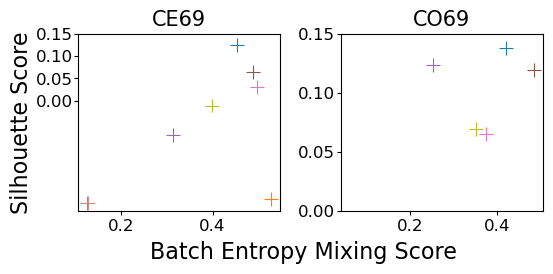

In [14]:
plt.rc('font', family='Helvetica')
plt.rcParams['pdf.fonttype'] = 42

from matplotlib import gridspec
figsize=(6,2.3)
fig = plt.figure(figsize=figsize)
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['figure.dpi'] = 100
legend_params_ = {'loc': 'center left',
                  'bbox_to_anchor':(1.05, 0.45),
                  'fontsize': 12,
                  'ncol': 1,
                  'frameon': False,
                  'markerscale': 1.2,
                 }
axs = gridspec.GridSpec(nrows=1, ncols=2, height_ratios=None, width_ratios=[1]*2, wspace=0.3, hspace=0)

for i, data in enumerate(datasets):
    ax = fig.add_subplot(axs[0, i])
    if i == 4:
        ax = sns.scatterplot(x="Batch_mixing_score", 
                             y="Silhouette_score", 
                             data=score.loc[score.Dataset == data,:],
                             hue='Method',
                             palette=palette,
                             legend=False,
                             marker='+',
                             s=100)
        
        plt.legend(**legend_params_)
    else:
        ax = sns.scatterplot(x="Batch_mixing_score", 
                             y="Silhouette_score", 
                             data=score.loc[score.Dataset == data,:],
                             hue='Method',
                             palette=palette, 
                             legend=False,
                             marker="+",
                             s=100)
        
    if i == 1:    
        plt.ylim(0,0.15)
    else:
        ax.set_yticks([0,0.05,0.1,0.15])
    ax.set_title(data, fontsize=15, va='center',pad=10)
    ax.tick_params(axis='y',left=True, right=False, labelright=False, labelleft=True, labelsize=12, length=3, pad=1)

    if i == 0:
        ax.set_ylabel('Silhouette Score', rotation=90, fontsize=16, labelpad=10, va='center')
    else:
        ax.set_ylabel('')

    ax.set_xlabel('', fontsize=15, labelpad=10, va='center')
    ax.tick_params(axis='x', bottom=True, top=False, labeltop=False, labelbottom=True, labelsize=12, length=3, pad=3, labelrotation=0)
fig.text(0.5, -0.1, 'Batch Entropy Mixing Score', ha='center',size=16)

In [19]:
def Plot_ASW_BEM(Silhouette_score,
                 batch_score,
                 ncols=2,
                 nrows=1,
                 palette=None,
                 figsize=(15,2.3),
                 set_yticks=[0,0.25,0.5,0.75,1],
                 set_xticks=[0.5,0.75,1],
                 save='~/SCALEX/figures/benchmark/Batch_mixing_score-Silhouette_score_louvain.pdf'
                 ):

    datasets = list(batch_score.index)
    methods = list(batch_score.columns)

    score = pd.DataFrame({'Dataset':np.repeat(datasets, len(methods)),
                       'Method': methods * len(datasets),
                       'Silhouette_score': np.reshape(Silhouette_score.values, (1, -1)).squeeze(),
                       'Batch_mixing_score': np.reshape(batch_score.values, (1, -1)).squeeze(),})
    
    
    
    plt.rc('font', family='Helvetica')
    plt.rcParams['pdf.fonttype'] = 42

    from matplotlib import gridspec
    figsize=figsize
    fig = plt.figure(figsize=figsize)
    plt.rcParams['savefig.dpi'] = 100
    plt.rcParams['figure.dpi'] = 100
    legend_params_ = {'loc': 'center left',
                      'bbox_to_anchor':(1.05, 0.45),
                      'fontsize': 12,
                      'ncol': 1,
                      'frameon': False,
                      'markerscale': 1.2,
                     }
    axs = gridspec.GridSpec(nrows=nrows, ncols=ncols, height_ratios=[1]*nrows, width_ratios=[1]*ncols, wspace=0.3, hspace=0.25)

    for i, data in enumerate(datasets):
        ax = fig.add_subplot(axs[0, i])
        if i == ncols-1:
            ax = sns.scatterplot(x="Batch_mixing_score", 
                                 y="Silhouette_score", 
                                 data=score.loc[score.Dataset == data,:],
                                 hue='Method',
                                 palette=palette,
    #                              legend=False,
                                 marker='+',
                                 s=100)

            plt.legend(**legend_params_)
        else:
            ax = sns.scatterplot(x="Batch_mixing_score", 
                                 y="Silhouette_score", 
                                 data=score.loc[score.Dataset == data,:],
                                 hue='Method',
                                 palette=palette, 
                                 legend=False,
                                 marker="+",
                                 s=100)
        ax.set_yticks(set_yticks)
        ax.set_xticks(set_xticks)
        ax.set_title(data, fontsize=15, va='center',pad=10)
        ax.tick_params(axis='y',left=True, right=False, labelright=False, labelleft=True, labelsize=12, length=3, pad=1)

        if i == 0:
            ax.set_ylabel('Silhouette_score', rotation=90, fontsize=16, labelpad=10, va='center')
        else:
            ax.set_ylabel('')

        ax.set_xlabel('', fontsize=15, labelpad=10, va='center')
        ax.tick_params(axis='x', bottom=True, top=False, labeltop=False, labelbottom=True, labelsize=12, length=3, pad=3, labelrotation=0)
    fig.text(0.51, -0.1, 'Batch_mixing_score', ha='center',size=16)
    if save:
        plt.savefig(save,format='pdf', bbox_inches='tight')
    else:
        plt.show()

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

Unexpected exception formatting exception. Falling back to standard exception


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

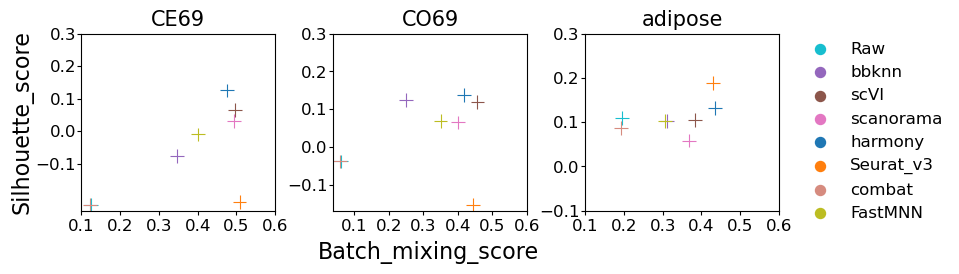

In [45]:
Plot_ASW_BEM(Silhouette_score,
             batch_score,
             ncols=3,
                 nrows=1,
                 palette=palette,
                 figsize=(9,2.3),
                 set_yticks=[-0.1,0, 0.1,0.2,0.3],
                 set_xticks=[0.1,0.2,0.3,0.4,0.5,0.6]
        
    
)